## Project 1 - Data Analysis

This project analyzes the rise in global temperatures starting from the year 1750 to 2013 on the given dataset. <br>
Part I of the notebook will focus on visualization and providing metrics about the dataset. <br>
Part II of the notebook will apply various machine learning models to accurately predict the average global temperature for the corresponding year. <br>
Part III of the file will throw insights on the correlation between rising global temperatures and the occurrences of floods, droughts, and extreme weather conditions globally.

In [649]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Part I: Perform data analysis of the dataset

In [650]:
global_temperature_df = pd.read_csv('GlobalLandTemperaturesByCountry.csv', index_col='dt', parse_dates=True)
figsize = (15,10)

#### 1. How many entries and variables does the data set comprise?

In [651]:
global_temperature_df.shape

(577462, 3)

#### 2. What types of data is included?

The following are the columns in the dataset
1. dt: Date. Starts from the year 1750 for average land temperatures
2. AverageTemperature: Global average land temperature in celsius
3. AverageTemperatureUncertainty: The 95% confidence interval around the average
4. Country: Country.

In [656]:
global_temperature_df.dtypes

AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [657]:
global_temperature_df.index.value_counts()

1970-01-01    243
2006-02-01    243
1956-08-01    243
1983-06-01    243
1976-05-01    243
             ... 
1745-08-01     50
1747-01-01     50
1743-11-01     50
1749-11-01     50
1750-06-01     50
Name: dt, Length: 3239, dtype: int64

In [658]:
global_temperature_df['Country'].value_counts()

Lithuania                              3239
Switzerland                            3239
United Kingdom                         3239
Bulgaria                               3239
Poland                                 3239
                                       ... 
Northern Mariana Islands               1329
Guam                                   1329
Heard Island And Mcdonald Islands       788
French Southern And Antarctic Lands     788
Antarctica                              764
Name: Country, Length: 243, dtype: int64

#### 3. Are there any data missing?
 
As we can briefly observe the data below. The columns 'AverageTemperature' and 'AverageTemperatureUncertainty' have missing values represented as NaN.
Also, the column 'Country' has many repeating instances over different months and years which needs to be dealt properly.

In [659]:
global_temperature_df.isnull().sum()

AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [660]:
global_temperature_df['AverageTemperature'].count()

544811

In [661]:
global_temperature_df['Country'].nunique()

243

In [662]:
global_temperature_df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [663]:
global_temperature_df.tail()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
2013-05-01,19.059,1.022,Zimbabwe
2013-06-01,17.613,0.473,Zimbabwe
2013-07-01,17.000,0.453,Zimbabwe
2013-08-01,19.759,0.717,Zimbabwe
2013-09-01,NaN,NaN,Zimbabwe


#### 4. Provide the main statistics about the entries of the dataset (mean, std, etc.)

In [664]:
global_temperature_df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


#### 5. Visualize the data (min 3 graphs), e.g. correlation between different variables. Are there any interesting patterns?

In [665]:
global_temperature_df[['AverageTemperature', 'Country']].groupby(['Country']).mean().sort_values('AverageTemperature', ascending=True)

,AverageTemperature
Country,
Greenland,-18.587458
Denmark,-18.053051
Svalbard And Jan Mayen,-7.448028
Russia,-5.521882
Canada,-5.216659
...,...
Senegal,27.967375
Burkina Faso,28.083507
Mali,28.441977


Global average temperature distribution

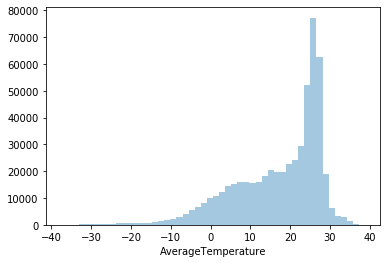

In [666]:
sns.distplot(global_temperature_df['AverageTemperature'], kde=False, rug=False);

In [667]:
country_mean_temperatures = global_temperature_df.groupby(['Country'])['AverageTemperature'].mean().reset_index()
country_mean_temperatures = country_mean_temperatures.dropna()

Visualizing the mean temperature trends from the years 1750 to 2013 for the top 20 hottest and coldest countries.

Text(0.5, 1.0, 'Temperature trends from 1750 - 2013 for top 5 coldest countries')

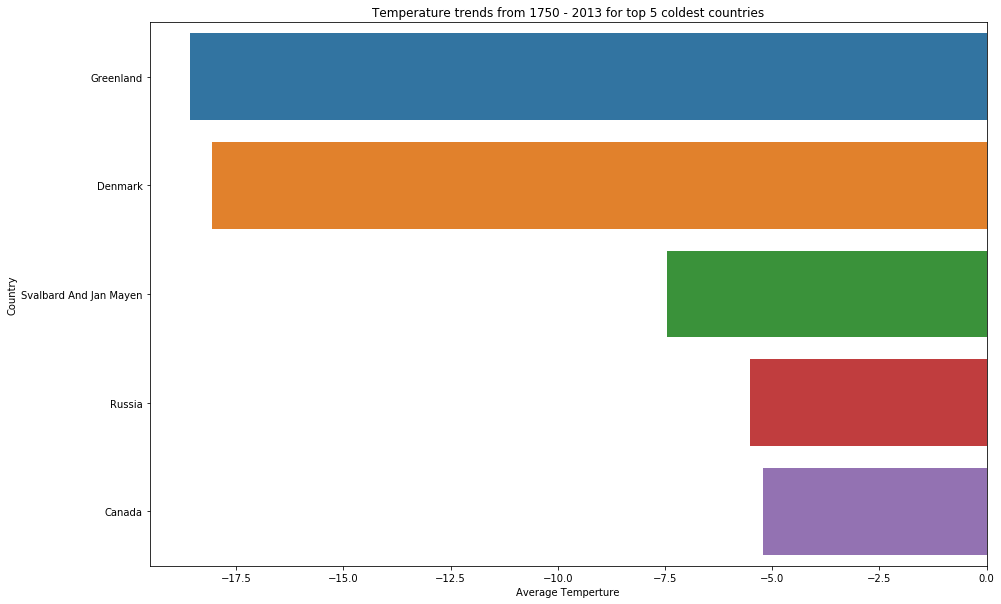

In [668]:
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(y='Country', x='AverageTemperature', data=country_mean_temperatures.sort_values(by='AverageTemperature', ascending=True)[0:5])
plt.xlabel('Average Temperture')
plt.ylabel('Country')
plt.title('Temperature trends from 1750 - 2013 for top 5 coldest countries')

Text(0.5, 1.0, 'Temperature trends from 1750 - 2013 for top 5 hottest countries')

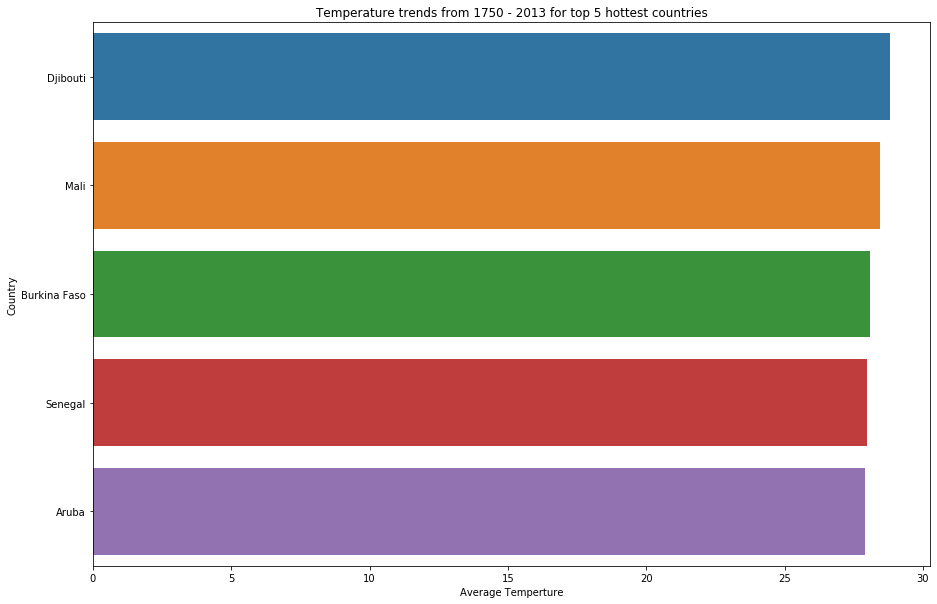

In [669]:
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(y='Country', x='AverageTemperature', data=country_mean_temperatures.sort_values(by='AverageTemperature', ascending=False)[0:5])
plt.xlabel('Average Temperture')
plt.ylabel('Country')
plt.title('Temperature trends from 1750 - 2013 for top 5 hottest countries')

Temperature trend of countries with Coldest and Hottest average temperatures 1800 to 2013

In [670]:
greenland_df = global_temperature_df[global_temperature_df['Country'] == 'Greenland'].dropna()
greenland_df['year']=greenland_df.index.map(lambda x: x.year)

djibouti_df = global_temperature_df[global_temperature_df['Country'] == 'Djibouti'].dropna()
djibouti_df['year']=djibouti_df.index.map(lambda x: x.year)

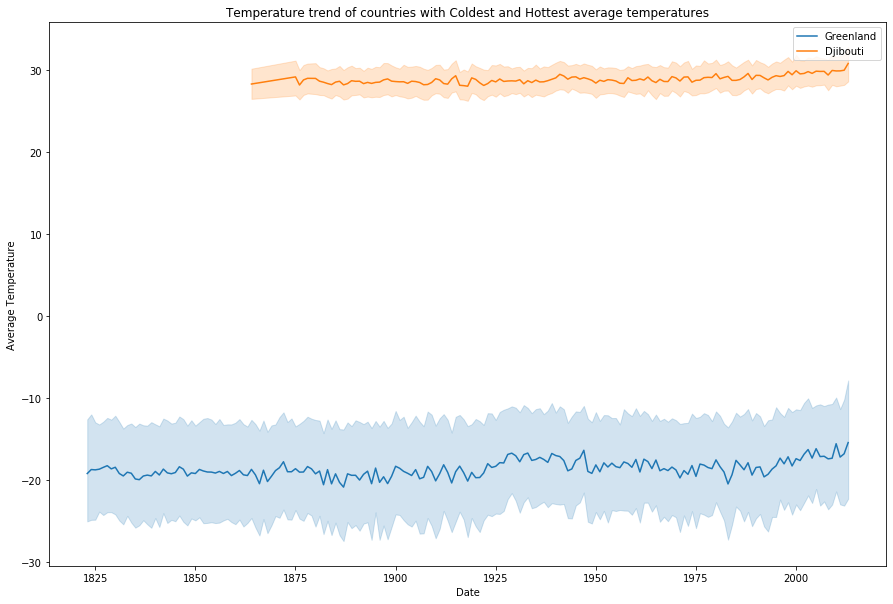

In [671]:
plt.figure(figsize=figsize)
sns.lineplot(x='year', y='AverageTemperature', data=greenland_df, label='Greenland')
sns.lineplot(x='year', y='AverageTemperature', data=djibouti_df, label='Djibouti')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Temperature trend of countries with Coldest and Hottest average temperatures')
plt.legend()

In [672]:
global_temperature_df['Year'] = global_temperature_df.index.map(lambda x: x.year)
global_temperature_df = global_temperature_df.dropna()

As observed in the heat map below, there exists a weak correlation between the year and the average global temperatures. At a high level we can state that the global temperatures keep rising every year.

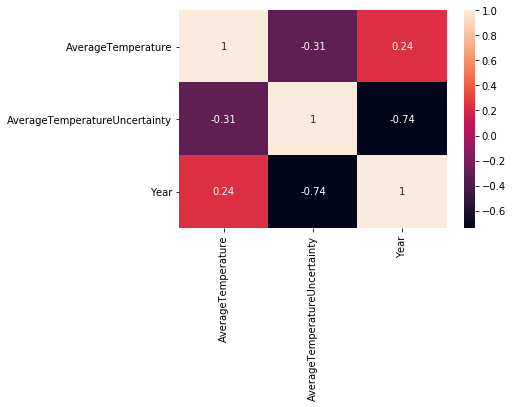

In [673]:
sns.heatmap(global_temperature_df.corr(), annot=True)

### Part II: Apply ML analysis

In [674]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

#### 1. Choose the features and targets in the dataset.

The features chosen from this dataset are 'Year' and 'AverageTemperature'. The mean of average temperature for repeating values of year is implemented in the section below.

In [675]:
global_mean_temperatures_year = global_temperature_df.groupby(['Year'])['AverageTemperature'].mean().reset_index()
X = global_mean_temperatures_year[['Year']].values
Y = global_mean_temperatures_year[['AverageTemperature']].values

#### 2. Preprocess the dataset for training (e.g. cleaning and filling the missing variables, split between training/testing/validation).

Cleaning the dataset has been already performed in earlier steps. In the previous sections we chose the year column, dropped the NaN values and took mean of the average temperatures every year globally. The code is shown below.

1. global_temperature_df['Year'] = global_temperature_df.index.map(lambda x: x.year)
2. global_temperature_df = global_temperature_df.dropna()
3. global_mean_temperatures_year = global_temperature_df.groupby(['Year'])['AverageTemperature'].mean().reset_index()

In [676]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test: " + str(y_test.shape))

X_train: (200, 1)
X_test: (67, 1)
y_train: (200, 1)
y_test: (67, 1)


#### 3. Apply ML algorithms (min 3 algorithms) to model the target variable. This can be either classification or regression task.

We will be using a regression algorithm to achieve our task since the target variable is a value. <br>
Linear Regression

In [677]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_score = linear_regression.score(X_test, y_test)
print("Training accuracy: " + str(linear_regression.score(X_train, y_train)))
print("Testing accuracy: " + str(linear_regression_score))

y_pred = linear_regression.predict(X_test)

Training accuracy: 0.8384467176472734
Testing accuracy: 0.8189453126333253


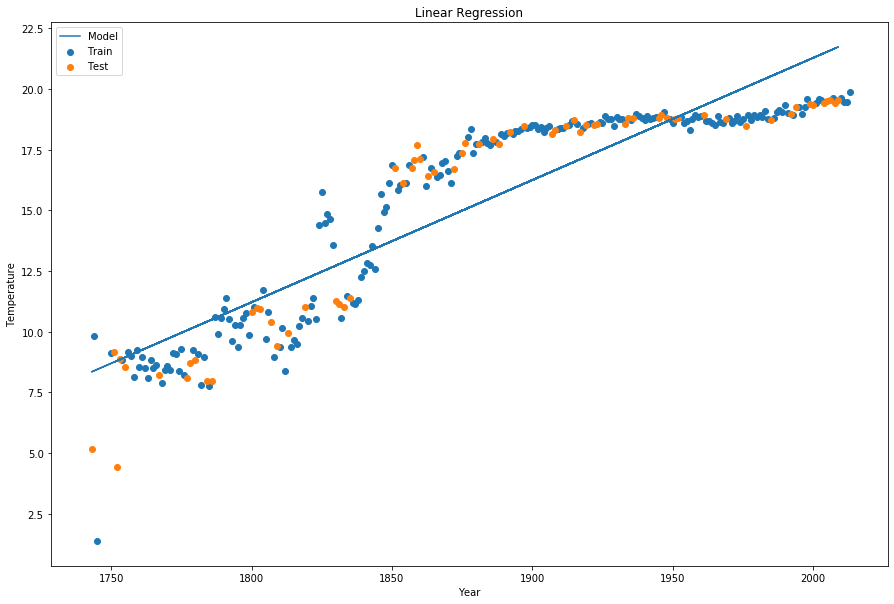

In [678]:
plt.figure(figsize=figsize)
plt.scatter(X_train, y_train, label = "Train")
plt.scatter(X_test, y_test, label = "Test")
plt.plot(X_test, y_pred, label = "Model")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Linear Regression")
plt.legend()

Polynomial Regression

In [679]:
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [680]:
linear_regression.fit(X_train_poly, y_train)
polynomial_regression_score = linear_regression.score(X_test_poly, y_test)
print("Training accuracy: " + str(linear_regression.score(X_train_poly, y_train)))
print("Testing accuracy: " + str(polynomial_regression_score))

y_pred = linear_regression.predict(poly.fit_transform(X))

Training accuracy: 0.9404781529195495
Testing accuracy: 0.9479415331711434


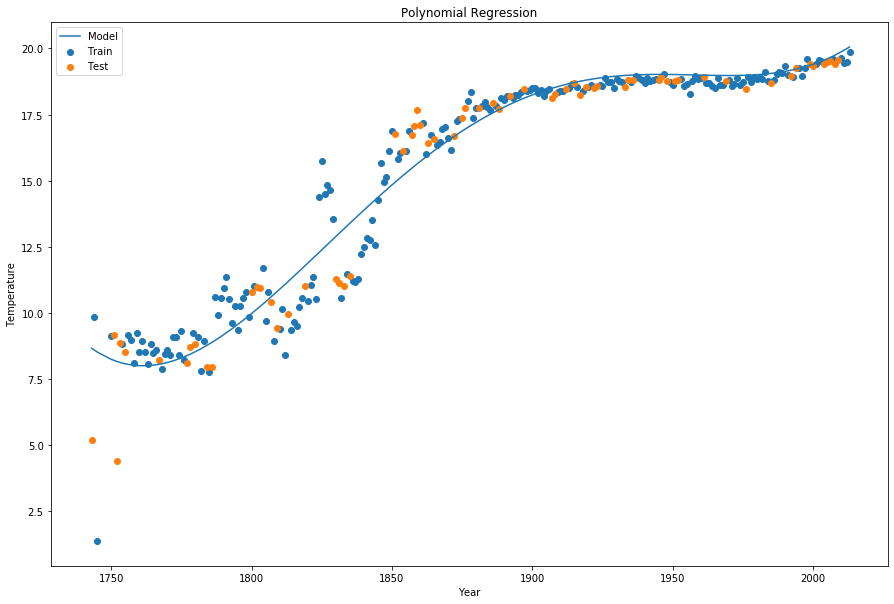

In [681]:
plt.figure(figsize=figsize)
plt.scatter(X_train, y_train, label = "Train")
plt.scatter(X_test, y_test, label = "Test")
plt.plot(X, y_pred, label = "Model")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

In [682]:
scx = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)

Elastic Net 

In [683]:
elasticnet_regression = ElasticNet()
elasticnet_regression.fit(X_train, y_train)
elastic_net_score = elasticnet_regression.score(X_test, y_test)
print("Training accuracy: " + str(elasticnet_regression.score(X_train, y_train)))
print("Testing accuracy: " + str(elastic_net_score))

y_pred = elasticnet_regression.predict(X_test)

Training accuracy: 0.6908593830948011
Testing accuracy: 0.6661677766715983


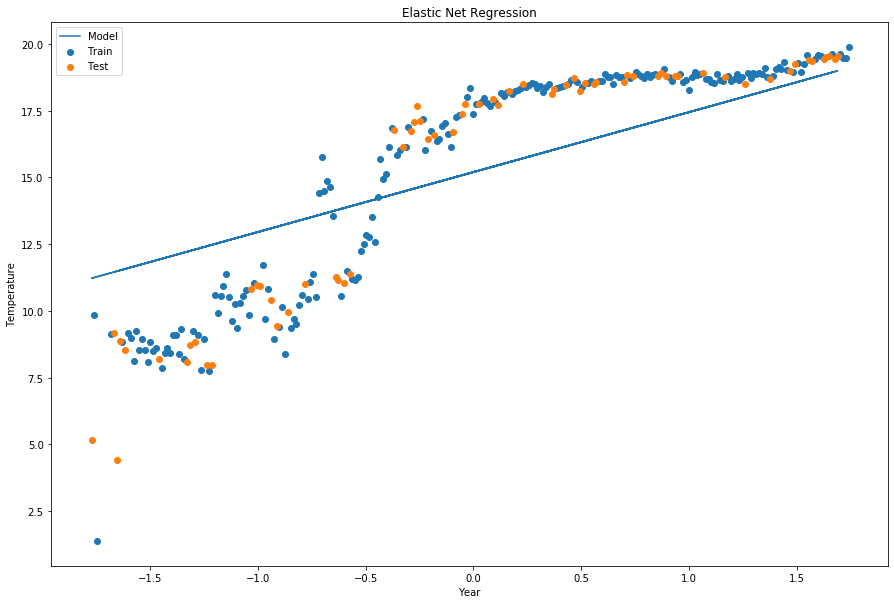

In [684]:
plt.figure(figsize=figsize)
plt.scatter(X_train, y_train, label = "Train")
plt.scatter(X_test, y_test, label = "Test")
plt.plot(X_test, y_pred, label = "Model")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Elastic Net Regression")
plt.legend()

MLP Regressor

In [685]:
# MLP Regressor
mlp_regression = MLPRegressor(max_iter=10000)
mlp_regression.fit(X_train, np.asarray(y_train).ravel())
mlp_regressor_score = mlp_regression.score(X_test, y_test)
print("Training accuracy: " + str(mlp_regression.score(X_train, y_train)))
print("Testing accuracy: " + str(mlp_regressor_score))

y_pred = mlp_regression.predict(X_test)

Training accuracy: 0.9389249728422195
Testing accuracy: 0.9463771197733116


#### 4. Provide the comparison of the results of different ML models you have used. This can be in the form of graph representation and your reasoning about the results.

Explanation: As we can observe from the results, the graph; the first model linear regression doesn't perform well for the increasing variations in data. Linear regression is the most basic form, where the model is not penalized for its choice of weights. <br>
The second model Polynomial regression is useful because of the increasing complexity in the data. Since we pass a degree of 4, the complexity of the model increases and tends to fit well for most of the data as observed in the graph. However, as we further increasing the degree, the model tends to overfit the data. <br>
In the third model, the elastic net is a hybrid of lasso and ridge, where both the absolute value penalization and squared penalization are included in the model. However, we do not see any increase in overall accuracy. This could be attributed to the selection of sparse weights by the model to represent the dataset.<br>
The fourth model MLP regressor performs well as it tends to optimize the squared loss using the stochastic gradient descent method.

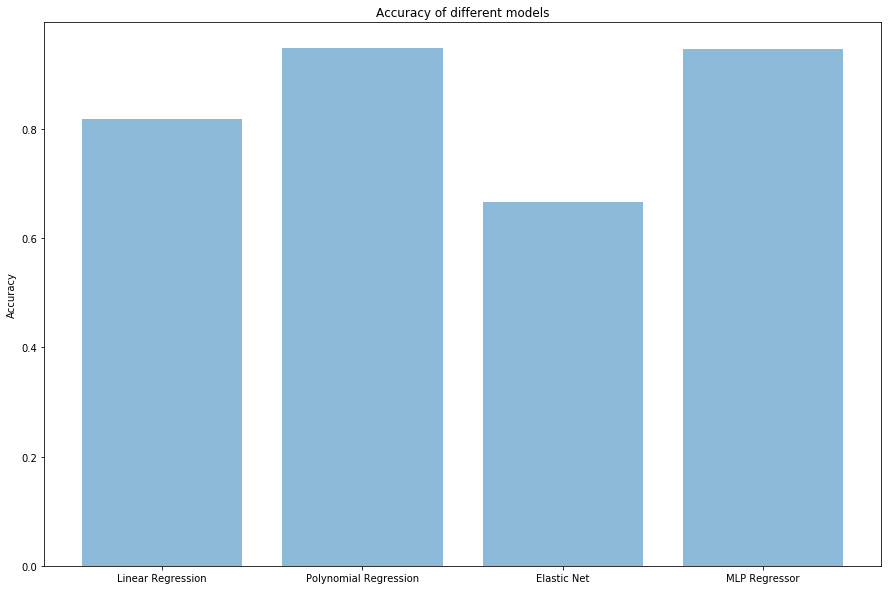

In [686]:
objects = ('Linear Regression', 'Polynomial Regression', 'Elastic Net', 'MLP Regressor')
scores = [linear_regression_score, polynomial_regression_score, elastic_net_score, mlp_regressor_score]
plt.figure(figsize=figsize)
plt.bar(objects, scores, align='center', alpha=0.5)
plt.xticks(objects)
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.show()

### Part III: Employ multiple datasets and extract insights

#### 1. Choose any related dataset to your current one. Combine the two into one dataset. The combined dataset doesn’t have size requirements.

In [687]:
natural_disaster_df = pd.read_csv('natural_disaster_events.csv', index_col='Year')

In [688]:
natural_disaster_df.sort_index(inplace=True)

In [689]:
natural_disaster_df.shape

(828, 3)

In [690]:
natural_disaster_df.dtypes

Entity             object
Code              float64
ReportedEvents      int64
dtype: object

In [691]:
natural_disaster_df.head()

,Entity,Code,ReportedEvents
Year,,,
1900,All natural disasters,NaN,5
1900,Flood,NaN,1
1900,Drought,NaN,2
1900,Volcanic activity,NaN,1
1900,Extreme weather,NaN,1


In [692]:
natural_disaster_df.drop(['Code'], axis=1, inplace=True)

In [693]:
natural_disaster_df['Entity'].unique()

array(['All natural disasters', 'Flood', 'Drought', 'Volcanic activity',
       'Extreme weather', 'Earthquake', 'Mass movement (dry)',
       'Landslide', 'Wildfire', 'Extreme temperature', 'Impact'],
      dtype=object)

In [694]:
natural_disaster_df = natural_disaster_df.pivot(columns = 'Entity', values = 'ReportedEvents')
natural_disaster_df.fillna(value=0, inplace=True)

In [695]:
natural_disaster_data_mean = natural_disaster_df.groupby(['Year'])[['Drought', 'Flood', 'Extreme weather', 'Extreme temperature']].mean().reset_index()

In [696]:
natural_disaster_data_mean.head()

Entity,Year,Drought,Flood,Extreme weather,Extreme temperature
0,1900,2.0,1.0,1.0,0.0
1,1901,0.0,0.0,0.0,0.0
2,1902,0.0,0.0,1.0,0.0
3,1903,1.0,2.0,2.0,0.0
4,1904,0.0,0.0,1.0,0.0


In [697]:
natural_disaster_data_mean.tail()

Entity,Year,Drought,Flood,Extreme weather,Extreme temperature
114,2014,18.0,135.0,99.0,17.0
115,2015,28.0,160.0,118.0,12.0
116,2016,15.0,161.0,84.0,12.0
117,2017,7.0,114.0,85.0,11.0
118,2018,13.0,109.0,84.0,25.0


In [698]:
natural_disaster_data_mean.shape

(119, 5)

In [699]:
global_mean_temperatures_year.shape

(267, 2)

To combine the data select values for the year column from 1900 to 2013 from both the datasets

In [700]:
combined_df = global_mean_temperatures_year.loc[range(153, 267)].merge(natural_disaster_data_mean.loc[range(0, 114)], left_on='Year', right_on='Year')

In [701]:
combined_df

,Year,AverageTemperature,Drought,Flood,Extreme weather,Extreme temperature
0,1900,18.514536,2.0,1.0,1.0,0.0
1,1901,18.491193,0.0,0.0,0.0,0.0
2,1902,18.328011,0.0,0.0,1.0,0.0
3,1903,18.434771,1.0,2.0,2.0,0.0
4,1904,18.211075,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
109,2009,19.546385,18.0,151.0,87.0,25.0
110,2010,19.629806,17.0,184.0,94.0,29.0
111,2011,19.456040,17.0,156.0,84.0,16.0
112,2012,19.468744,21.0,136.0,90.0,51.0


#### 2. Choose the correlated variables.

As we can observe from the heatmap below for the combined dataset, there seems to exist a strong correlation between the average temperatures and flood, extreme weather conditions. 
Hence for the statistical analysis we will choose the values for average temperatures, flood and extreme weather columns in the combined dataset.

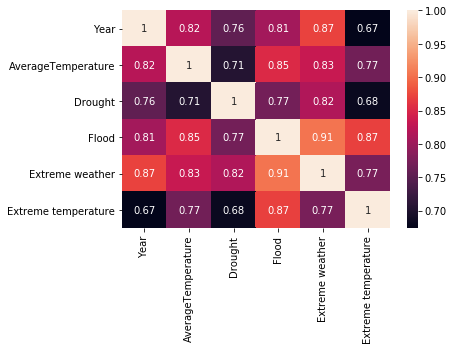

In [702]:
sns.heatmap(combined_df.corr(), annot=True)

In [703]:
combined_df.drop(['Drought', 'Extreme temperature'], axis=1, inplace=True)

#### 3. Perform statistical analysis on finding the correlation between selected features from both datasets.

In [704]:
combined_df.describe()

,Year,AverageTemperature,Flood,Extreme weather
count,114.000000,114.000000,114.000000,114.000000
mean,1956.500000,18.833468,37.552632,32.096491
std,33.052988,0.358282,56.672494,37.943827
min,1900.000000,18.137156,0.000000,0.000000
25%,1928.250000,18.588383,1.000000,3.000000
50%,1956.500000,18.779577,8.000000,13.000000
75%,1984.750000,18.954003,48.750000,56.750000
max,2013.000000,19.877007,226.000000,137.000000


In [705]:
def normalize(x, col_min, col_max):
    return (x - col_min) / (col_max - col_min)

In [706]:
# Normalize the column values for 'Average Temperature', 'Flood' and 'Extreme Weather'
combined_df['AverageTemperature'] = combined_df['AverageTemperature'].apply(lambda x: normalize(x, combined_df['AverageTemperature'].min(), combined_df['AverageTemperature'].max()))
combined_df['Flood'] = combined_df['Flood'].apply(lambda x: normalize(x, combined_df['Flood'].min(), combined_df['Flood'].max()))
combined_df['Extreme weather'] = combined_df['Extreme weather'].apply(lambda x: normalize(x, combined_df['Extreme weather'].min(), combined_df['Extreme weather'].max()))

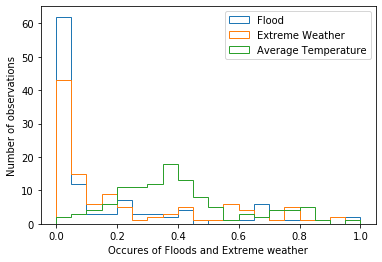

In [707]:
fig, ax = plt.subplots()
ax.hist(combined_df['Flood'], label='Flood', bins=20, histtype='step')
ax.hist(combined_df['Extreme weather'], label='Extreme Weather', bins=20, histtype='step')
ax.hist(combined_df['AverageTemperature'], label='Average Temperature', bins=20, histtype='step')
ax.set_xlabel('Occures of Floods and Extreme weather')
ax.set_ylabel('Number of observations')
ax.legend()
plt.show()

Calculate the deviations in temperatures over the years and plot a line

In [708]:
combined_df

,Year,AverageTemperature,Flood,Extreme weather
0,1900,0.216903,0.004425,0.007299
1,1901,0.203487,0.000000,0.000000
2,1902,0.109696,0.000000,0.007299
3,1903,0.171058,0.008850,0.014599
4,1904,0.042486,0.000000,0.007299
...,...,...,...,...
109,2009,0.809971,0.668142,0.635036
110,2010,0.857918,0.814159,0.686131
111,2011,0.758044,0.690265,0.613139
112,2012,0.765346,0.601770,0.656934


#### 4. Analyse the results and any interesting patterns.

1. I initially described the combined_df to observe any deviations in the mean, standard deviations for various columns.
2. There is a huge difference between the values of Average Temperature and Flood, Extreme Weather. On the other hand the columns 'Flood', 'Extreme weather' have values that closely match.
3. To plot correlations, we need to find the histogram data for these columns to see how the data is distributed. Since the distribution is largely uneven, I have normalized all the three columns.
4. The histogram shows that the distribution trends for all the correlated variables are mostly concentrated in similar bins. This can be useful to show how the temperature changes impact the weather conditions.
5. Finally, I plot the changes in the line plot to observe the trends between all the correlated variables. We can observe that the weather conditions are largely impacted by the change in average global temperatures after the year 1970 and henceforth.

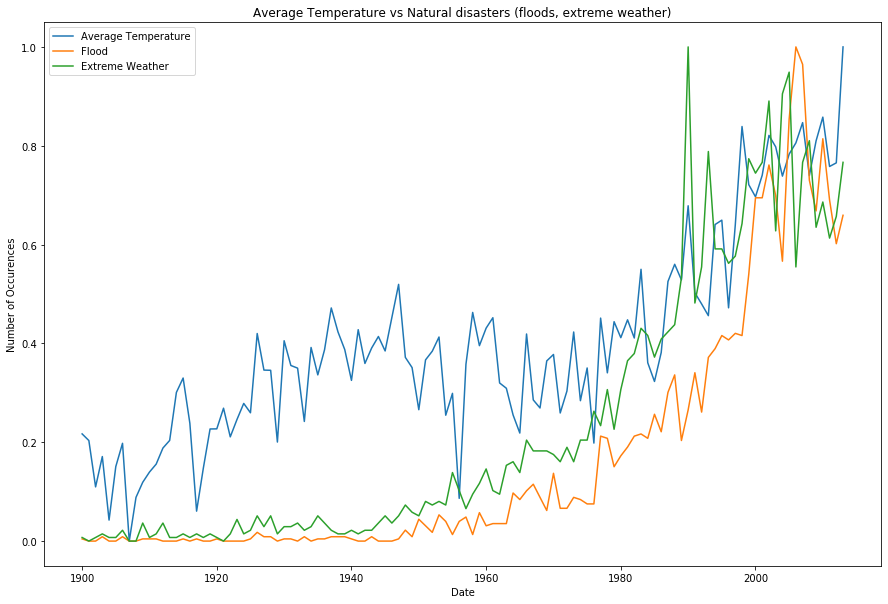

In [709]:
plt.figure(figsize=figsize)
sns.lineplot(x='Year', y='AverageTemperature', data=combined_df, label='Average Temperature')
sns.lineplot(x='Year', y='Flood', data=combined_df, label='Flood')
sns.lineplot(x='Year', y='Extreme weather', data=combined_df, label='Extreme Weather')
plt.xlabel('Date')
plt.ylabel('Number of Occurences')
plt.title('Average Temperature vs Natural disasters (floods, extreme weather)')
plt.legend()

### References

##### Datasets
1. [Climate Change: Earth Surface Temperature Data
](https://datasetsearch.research.google.com/search?query=global%20temperatures&docid=r32LBb1oqrQepe0eAAAAAA%3D%3D)

2. Hannah Ritchie (2014) - "Natural Disasters". Published online at [OurWorldInData.org](https://ourworldindata.org/natural-disasters)<br>
   Note: Needs registration process to fetch the dataset.

##### Readings
1. https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29

##### Code
1. https://stackoverflow.com/a/45760042/6379722
2. https://stackoverflow.com/a/30405634/6379722
3. https://stackoverflow.com/a/22211821/6379722
4. https://stackoverflow.com/a/26415620/6379722